In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [45]:
df_train = pd.read_csv('data\df_train.csv')
df_train.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,5YearRange,10YearRange
0,0.142857,1.000000,0.454545,0.733333,0.004464,0.061224,0.010720,0.013393,0.021818,0.025667,0.460993,0.547945,0.344086,0.284091,0.783505,0.0,0.340426,0.112903,1.000000,1.000000
1,0.000000,0.989247,0.818182,0.666667,0.048821,0.027211,0.117000,0.028274,0.105455,0.021561,0.531915,0.561644,0.150538,0.318182,0.742268,0.0,0.095745,0.080645,1.000000,1.000000
2,0.000000,0.290323,0.000000,0.000000,0.081242,0.000000,0.048235,0.047619,0.010909,0.066735,0.780142,0.383562,0.967742,0.284091,0.752577,0.0,0.074468,0.048387,0.277778,0.222222
3,0.285714,0.989247,0.454545,0.066667,0.016324,0.027211,0.047545,0.041667,0.000000,0.055441,0.460993,0.986301,0.849462,0.545455,0.556701,0.0,0.074468,0.370968,1.000000,1.000000
4,0.000000,1.000000,0.000000,0.733333,0.001948,0.027211,0.044971,0.005952,0.021818,0.000000,0.390071,0.452055,0.172043,0.386364,0.917526,0.0,0.095745,0.032258,1.000000,1.000000


In [4]:
df_train.columns

Index(['artist_count', 'released_year', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'bpm',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%', '5YearRange',
       '10YearRange'],
      dtype='object')

In [5]:
features = ['bpm','danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
            'instrumentalness_%', 'liveness_%', 'speechiness_%']

In [6]:
subset = df_train[features]

In [7]:
subset

,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0.460993,0.547945,0.344086,0.284091,0.783505,0.0,0.340426,0.112903
1,0.531915,0.561644,0.150538,0.318182,0.742268,0.0,0.095745,0.080645
2,0.780142,0.383562,0.967742,0.284091,0.752577,0.0,0.074468,0.048387
3,0.460993,0.986301,0.849462,0.545455,0.556701,0.0,0.074468,0.370968
4,0.390071,0.452055,0.172043,0.386364,0.917526,0.0,0.095745,0.032258
...,...,...,...,...,...,...,...,...
748,0.361702,0.780822,0.946237,0.806818,0.041237,0.0,0.074468,0.016129
749,0.219858,0.671233,0.387097,0.431818,0.731959,0.0,0.106383,0.032258
750,0.531915,0.287671,0.397849,0.943182,0.000000,0.0,0.436170,0.080645
751,0.425532,0.835616,0.709677,0.681818,0.010309,0.0,0.021277,0.048387


**Dla KMeans szukamy najlepszej liczby klastrów za pomocą różnych metryk**

In [8]:
sse = []
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []
possible_k_values = range(2, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(subset)
    sse.append(kmeans.inertia_)

    cluster_labels = kmeans.labels_
    
    # Silhouette Score
    silhouette_avg = silhouette_score(subset, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Calinski-Harabasz Index
    calinski_harabasz_avg = calinski_harabasz_score(subset, cluster_labels)
    calinski_harabasz_scores.append(calinski_harabasz_avg)
    
    # Davies-Bouldin Index
    davies_bouldin_avg = davies_bouldin_score(subset, cluster_labels)
    davies_bouldin_scores.append(davies_bouldin_avg)



C:\Users\basiu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\basiu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\basiu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\basiu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

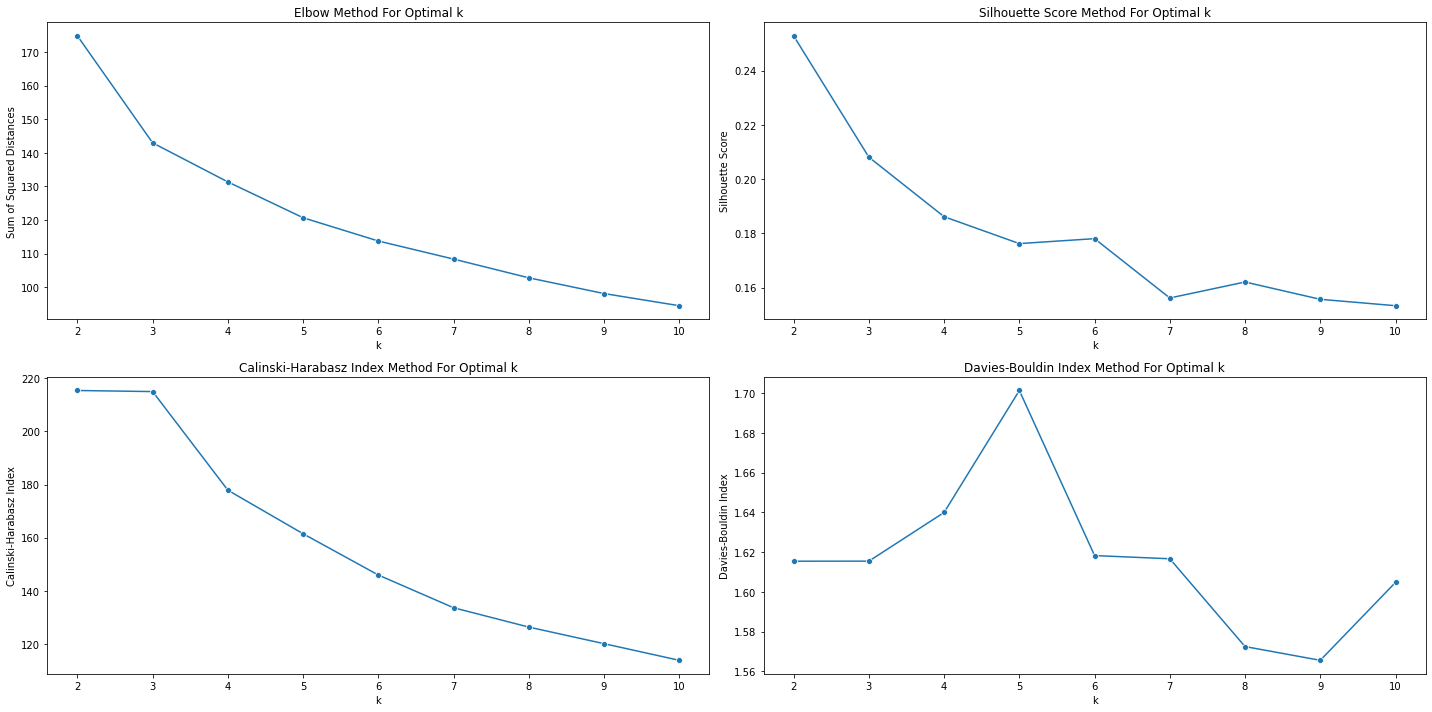

In [9]:
plt.figure(figsize=(20, 10))

# Elbow Method
plt.subplot(2, 2, 1)
sns.lineplot(x=possible_k_values, y=sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')

# Silhouette Score
plt.subplot(2, 2, 2)
sns.lineplot(x=possible_k_values, y=silhouette_scores, marker='o')
plt.title('Silhouette Score Method For Optimal k')
plt.xlabel('k')
plt.ylabel('Silhouette Score')

# Calinski-Harabasz Index
plt.subplot(2, 2, 3)
sns.lineplot(x=possible_k_values, y=calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Index Method For Optimal k')
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz Index')

# Davies-Bouldin Index
plt.subplot(2, 2, 4)
sns.lineplot(x=possible_k_values, y=davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index Method For Optimal k')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()

- **Metoda łokcia**: 3 klastry
- **Silhouette Score**: 2 klastry
- **Calinski-Harabasz**: 3 klastry
- **Davies-Bouldin**: 2 lub 9 klastrów


**Inne sposoby klasteryzacji**

In [10]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=10)
y_dbscan = dbscan.fit_predict(subset)

In [11]:
silhouette_avg = silhouette_score(subset, y_dbscan)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.38323823967326764


In [12]:
# funkcja do zliczania obserwacji w poszczególnych klastrach
def print_number_of_clusters(array):
    
    unique_values, counts = np.unique(array, return_counts=True)

    for value, count in zip(unique_values, counts):
        print(f'Value: {value}, Count: {count}')

In [13]:
print_number_of_clusters(y_dbscan)

Value: -1, Count: 2
Value: 0, Count: 751


Widać że dbscan trochę słabo działa bo prawie wszystko jest w jednym klastrze

In [14]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
y_gmm = gmm.fit_predict(subset)
print_number_of_clusters(y_gmm)

C:\Users\basiu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Value: 0, Count: 36
Value: 1, Count: 32
Value: 2, Count: 685


In [15]:
from sklearn.cluster import MeanShift

mean_shift = MeanShift()
y_mean_shift = mean_shift.fit_predict(subset)
print_number_of_clusters(y_mean_shift)

Value: 0, Count: 742
Value: 1, Count: 11


In [16]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
y_spectral = spectral.fit_predict(subset)
print_number_of_clusters(y_spectral)

C:\Users\basiu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Value: 0, Count: 334
Value: 1, Count: 314
Value: 2, Count: 105


Spectral Clustering ma jakiś potencjał więc poszukamy najlepszej ilości klastrów.

In [17]:

silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []
possible_k_values = range(2, 11)

for k in possible_k_values:
   spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=42)
   cluster_labels = spectral.fit_predict(subset)
    
   
    # Silhouette Score
   silhouette_avg = silhouette_score(subset, cluster_labels)
   silhouette_scores.append(silhouette_avg)
    
    # Calinski-Harabasz Index
   calinski_harabasz_avg = calinski_harabasz_score(subset, cluster_labels)
   calinski_harabasz_scores.append(calinski_harabasz_avg)
    
    # Davies-Bouldin Index
   davies_bouldin_avg = davies_bouldin_score(subset, cluster_labels)
   davies_bouldin_scores.append(davies_bouldin_avg)
    
   


C:\Users\basiu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\basiu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\basiu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\basiu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

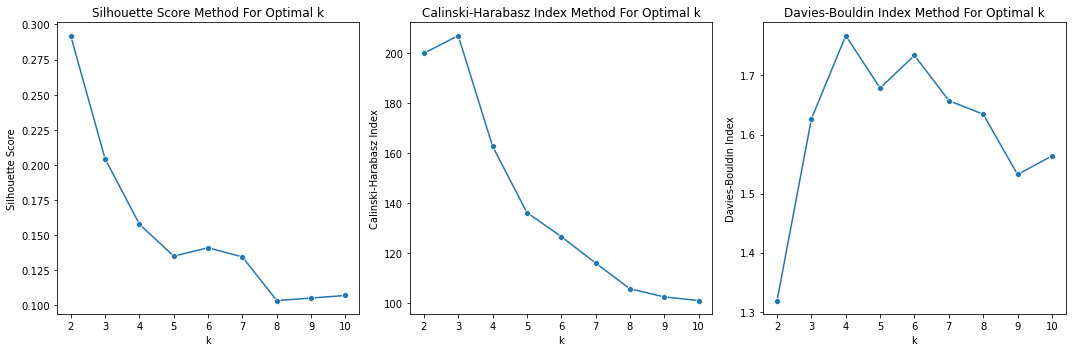

In [18]:
plt.figure(figsize=(15, 5))
# Silhouette Score
plt.subplot(1, 3, 1)
sns.lineplot(x=possible_k_values, y=silhouette_scores, marker='o')
plt.title('Silhouette Score Method For Optimal k')
plt.xlabel('k')
plt.ylabel('Silhouette Score')

# Calinski-Harabasz Index
plt.subplot(1, 3, 2)
sns.lineplot(x=possible_k_values, y=calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Index Method For Optimal k')
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz Index')

# Davies-Bouldin Index
plt.subplot(1, 3, 3)
sns.lineplot(x=possible_k_values, y=davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index Method For Optimal k')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()

- **Silhouette Score**: 2 klastry
- **Calinski-Harabasz**: 3 klastry
- **Davies-Bouldin**: 2 klastry


Żeby zobaczyć jak wyglądają klastry użyjemy PCA w celu zmniejszeniu wymiarów z 8 do 2

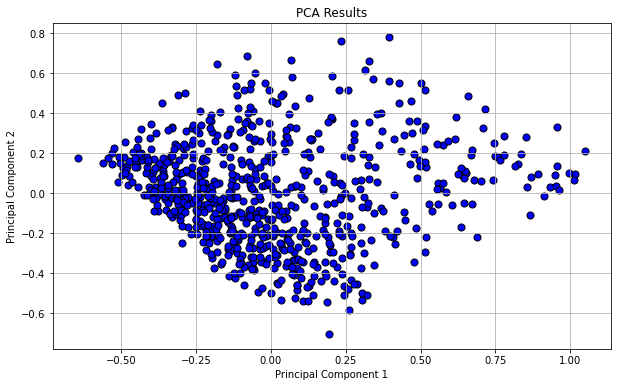

Explained variance ratio: [0.3376464  0.21754411]


In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  
principal_components = pca.fit_transform(subset)


plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


explained_variance = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_variance)


In [20]:
spectral2 = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
cluster_labels2 = spectral2.fit_predict(subset)

spectral3 = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
cluster_labels3 = spectral3.fit_predict(subset)

C:\Users\basiu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\basiu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


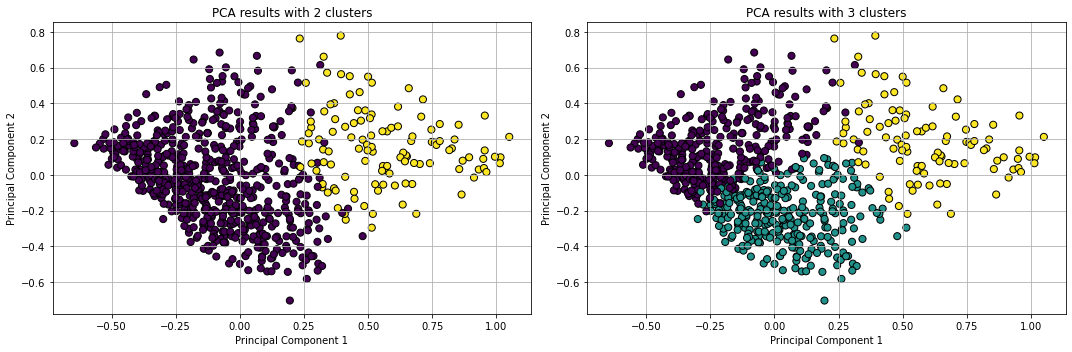

In [21]:
pca = PCA(n_components=2)  
principal_components = pca.fit_transform(subset)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels2, edgecolor='k', s=50)
plt.title('PCA results with 2 clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels3, edgecolor='k', s=50)
plt.title('PCA results with 3 clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

plt.tight_layout()
plt.show()


In [22]:
subset.head()

,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0.460993,0.547945,0.344086,0.284091,0.783505,0.0,0.340426,0.112903
1,0.531915,0.561644,0.150538,0.318182,0.742268,0.0,0.095745,0.080645
2,0.780142,0.383562,0.967742,0.284091,0.752577,0.0,0.074468,0.048387
3,0.460993,0.986301,0.849462,0.545455,0.556701,0.0,0.074468,0.370968
4,0.390071,0.452055,0.172043,0.386364,0.917526,0.0,0.095745,0.032258


## Analiza klastrów

In [24]:
cluster_labels3

array([2, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 1, 2, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 2,
       0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       2, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2,
       2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 2, 0, 1, 1, 0, 2, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1, 0, 1, 2, 0, 0,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 0, 0,

In [25]:
#dodanie kolumny cluster

subset['cluster'] = cluster_labels3

C:\Users\basiu\AppData\Local\Temp\ipykernel_18092\819191820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cluster'] = cluster_labels3


In [26]:
subset.head()

,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cluster
0,0.460993,0.547945,0.344086,0.284091,0.783505,0.0,0.340426,0.112903,2
1,0.531915,0.561644,0.150538,0.318182,0.742268,0.0,0.095745,0.080645,2
2,0.780142,0.383562,0.967742,0.284091,0.752577,0.0,0.074468,0.048387,0
3,0.460993,0.986301,0.849462,0.545455,0.556701,0.0,0.074468,0.370968,0
4,0.390071,0.452055,0.172043,0.386364,0.917526,0.0,0.095745,0.032258,2


In [44]:
for i in range(0,8):
    cluster_summary = subset.iloc[:,[i,8]].groupby('cluster').describe()
    print(cluster_summary) 

           bpm                                                              \
         count      mean       std       min       25%       50%       75%   
cluster                                                                      
0        334.0  0.388117  0.180462  0.042553  0.234043  0.390071  0.496454   
1        314.0  0.428355  0.203403  0.042553  0.262411  0.411348  0.567376   
2        105.0  0.405674  0.228267  0.000000  0.219858  0.390071  0.560284   

                   
              max  
cluster            
0        1.000000  
1        0.985816  
2        1.000000  
        danceability_%                                                    \
                 count      mean       std       min       25%       50%   
cluster                                                                    
0                334.0  0.727053  0.135446  0.328767  0.643836  0.739726   
1                314.0  0.537170  0.182836  0.068493  0.410959  0.534247   
2                105.0  0.41487

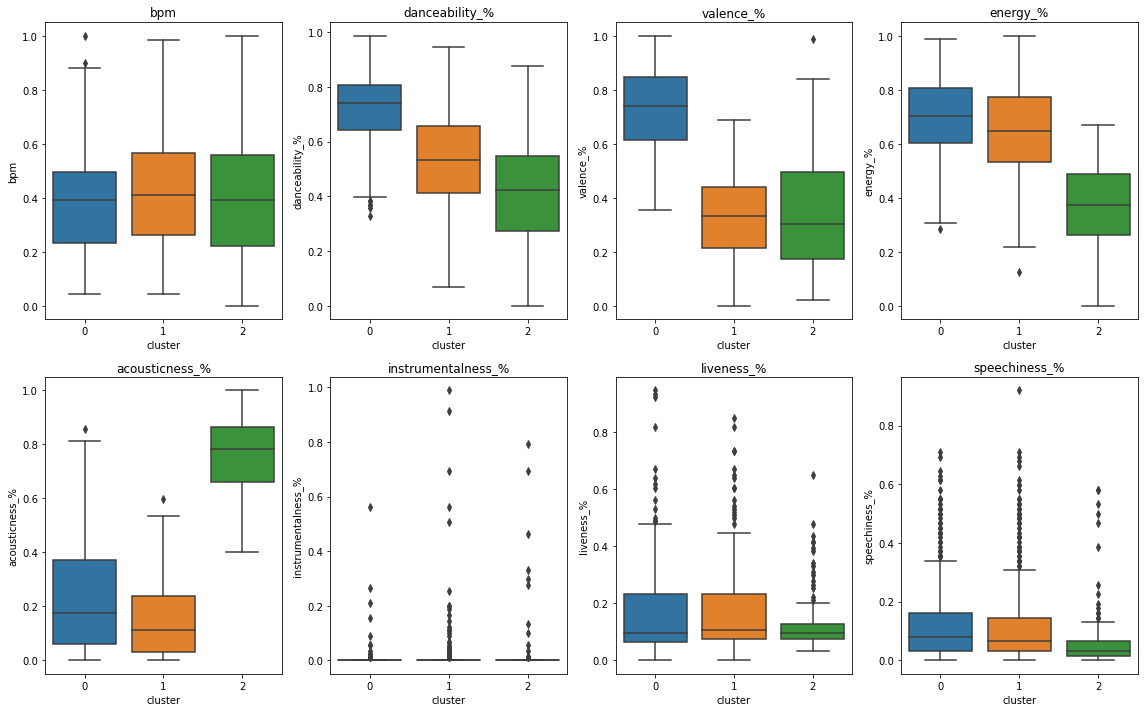

In [51]:
plt.figure(figsize=(16, 10))

# Tworzenie wykresów pudełkowych dla każdej cechy
features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

for i, feature in enumerate(features):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x='cluster', y=feature, data=subset)
    plt.title(feature)

plt.tight_layout()
plt.show()

### Co mozna wywnioskowac z powyzszego zestawienia?
1. bpm (beaty na minute) - średnio "najszybsze" piosenki znajduja sie w klastrze 1,nastepnie w 2 i "najwolniejsze" ale nie o wiele mniej w 0. 
2. dancebility (tanecznosc) - zdecydowanie najbardziej taneczzne piosenki znajduja się w klastrze 0, najmniej w klastrze 2
3. valence (pozytywnosc) - zdecydowanie najwieksze srednie wartosci w klastrze 0 (0.734112) , najmniejsze w 1 (0.332374) , ale bliskie do 2
4. energy - najbardziej energetyczne piosenki sa w 0 (0.697435), bardzo blisko jest 1, najmneij energetyczne w  2 (0.367100)
5. acousticness - bardzo akustyczne piosenki w klastrze 2 (0,76) o wiele mniej w 0 i 1
6. instrumentalness - ekstremalnie malo instrumentalne piosenki w klastrze 0, bardzo malo 1, wiecej ale niewiele w 2 (0.03)
7. liveness (sposob nagrania, piosenki nagrane w studiu badz na zywo) - podobnie dla wszystkich klastrow, lekko nizszy wynik w klastrze 2
8. speechiness (zawartosc elementow mowionych) - wynik dla klastru 0 i 1 niemal identyczny, dwukrotnie nizszy dla klastru 2


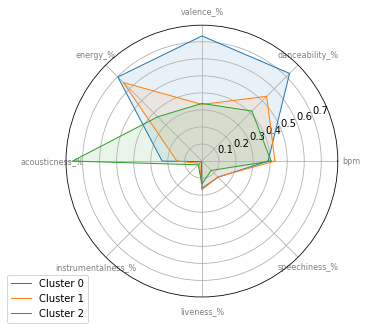

In [59]:
from math import pi
import numpy as np

cluster_means = subset.groupby('cluster').mean()
categories = list(cluster_means.columns)
N = len(categories)
plt.figure(figsize=(5,5))

for cluster in cluster_means.index:
    values = cluster_means.loc[cluster].values.flatten().tolist()
    values += values[:1]  # Powtórzenie pierwszej wartości na koniec, aby zamknąć wykres

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(1, 1, 1, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

## PODSUMOWANIE wstepnej analizy
###  - KLASTER 0 
    Bardzo taneczne, pozytywne, energetyczne, nieakustyczne, nieinstrumentalne, elementy mowione, dosc wolne =>  
    mozliwe gatunki: pop, dance pop, hip hop, funk, r&b,
    mozliwi artysci : Beyoncé, The Weeknd, Alicia Keys, Taylor Swift, Bruno Mars, Drake, Cardi B, Dua Lipa, Lady Gaga, Calvin Harris
    
###  - KLASTER 1 
    Najszybsze, taneczne, elementy mowione, najmniej pozytywne, energetyczne, nieakustyczne, nieinstrumentalne => 
    mozliwe gatunki : trap, rap, techno, 
###  - KLASTER 2 
    srednio szybkie, malo taneczne, dosc malo pozytywne, malo energetyczne, bardzo akustyczne,najbardziej instrumentalne, bardzo malo elementow mowionych => 
    mozliwe gatunki: acoustic rock, classical, indie rock, indie folk, jazz, 

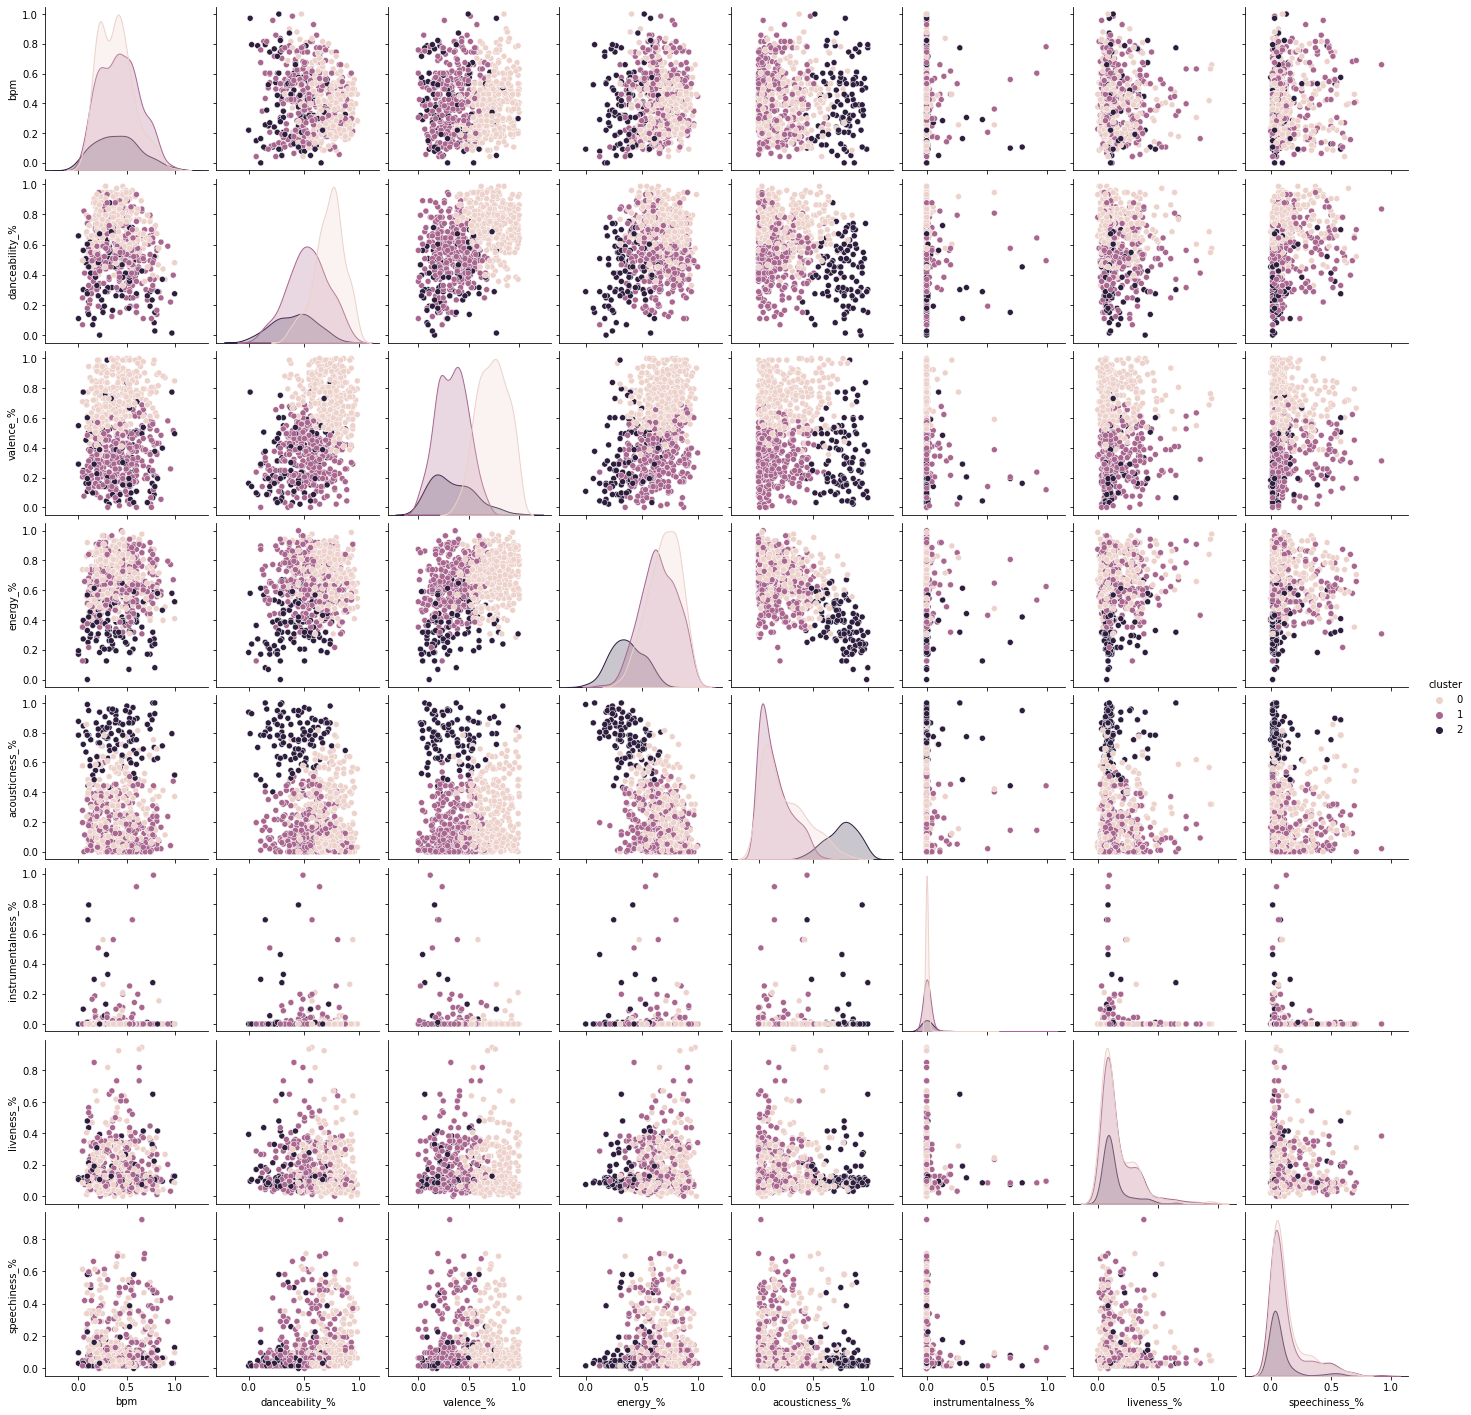

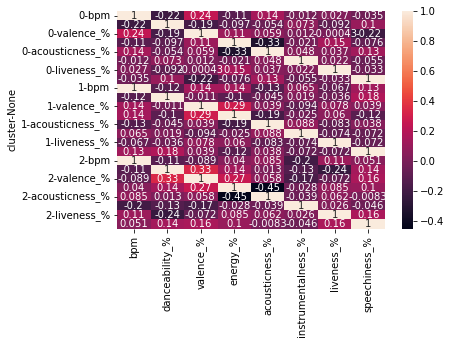

In [63]:
sns.pairplot(subset, hue='cluster')
plt.show()

correlation_matrix = subset.groupby('cluster').corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## Czy różnice między klastrami są istotne? - testy statystyczne

In [ ]:
# ANOVA (analiza wariancji) => czy średnie wartości cech różnią się między klastrami

In [60]:
import scipy.stats as stats

# hipoteza zerowa: nie ma roznic miedzy klastrami
# hipotera alternatywna: są różnice
# poziom istotnosci : 0.05
# jesli p-wartosc mniejsza od 0.05 to odrzucamy hipoteze zerowa => roznice miedzy klastrami sa istotne
# im wieksza wartosc statystyki testowej tym wieksze roznice miedzy klastrami 
for feature in features:
    f_val, p_val = stats.f_oneway(
        subset[subset['cluster'] == 0][feature],
        subset[subset['cluster'] == 1][feature],
        subset[subset['cluster'] == 2][feature]
    )
    print(f'ANOVA dla {feature}: statystyka={f_val}, p-wartość={p_val}')

ANOVA dla bpm: statystyka=3.368099287753377, p-wartość=0.03497702743022706
ANOVA dla danceability_%: statystyka=188.44788828469453, p-wartość=4.9154927816296566e-67
ANOVA dla valence_%: statystyka=582.4477764825734, p-wartość=2.2057932702346568e-153
ANOVA dla energy_%: statystyka=197.10429245555775, p-wartość=1.616304014450255e-69
ANOVA dla acousticness_%: statystyka=525.0887126914664, p-wartość=2.5394054799410173e-143
ANOVA dla instrumentalness_%: statystyka=5.006057197599535, p-wartość=0.006922782593783474
ANOVA dla liveness_%: statystyka=2.1887994112784246, p-wartość=0.11276645502754316
ANOVA dla speechiness_%: statystyka=6.151161313534444, p-wartość=0.0022400496515046636


## Różnice między naszymi klastrami są bardzo istotne statystycznie
1. Dla prawie kazdej cechy p-value jest mniejsza od poziomu istotnosci
2. Jedynie dla **liveness** przyjmujemy hipoteze zerową, poniewaz p = 0.113 > 0.05 => w tej kategorii nie ma istotnej roznicy w klastrach
3. Dla bpm odrzucamy H_0 => klastry różnią się, ale nie jest to ogromna różnica
4. Dla speechiness i instrumentalness różnice są istotne, ale nie aż tak jak dla pozostałych cech.
5. **Dla pozostałych cech p-value jest zdecydowanie mniejsza od poziomu istotnosci => są bardzo istotne różnice miedzy klastrami**

## Analiza klastrów w związku z pozostałymi cechami (artist_count, released, playlists, charts, streams)

In [48]:
merged_df = pd.merge(subset[['cluster']], df_train, 
                     left_index=True, right_index=True, how='left') # zmergowana ramka numeryczna (bez artist(s)_name i track_name)

In [49]:
merged_df.head()

,cluster,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,5YearRange,10YearRange
0,2,0.142857,1.000000,0.454545,0.733333,0.004464,0.061224,0.010720,0.013393,0.021818,...,0.460993,0.547945,0.344086,0.284091,0.783505,0.0,0.340426,0.112903,1.000000,1.000000
1,2,0.000000,0.989247,0.818182,0.666667,0.048821,0.027211,0.117000,0.028274,0.105455,...,0.531915,0.561644,0.150538,0.318182,0.742268,0.0,0.095745,0.080645,1.000000,1.000000
2,0,0.000000,0.290323,0.000000,0.000000,0.081242,0.000000,0.048235,0.047619,0.010909,...,0.780142,0.383562,0.967742,0.284091,0.752577,0.0,0.074468,0.048387,0.277778,0.222222
3,0,0.285714,0.989247,0.454545,0.066667,0.016324,0.027211,0.047545,0.041667,0.000000,...,0.460993,0.986301,0.849462,0.545455,0.556701,0.0,0.074468,0.370968,1.000000,1.000000
4,2,0.000000,1.000000,0.000000,0.733333,0.001948,0.027211,0.044971,0.005952,0.021818,...,0.390071,0.452055,0.172043,0.386364,0.917526,0.0,0.095745,0.032258,1.000000,1.000000


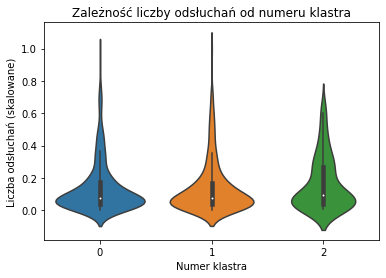

In [73]:
sns.violinplot(x='cluster', y='streams', data=merged_df)

plt.title('Zależność liczby odsłuchań od numeru klastra')
plt.xlabel('Numer klastra')
plt.ylabel('Liczba odsłuchań (skalowane)')
plt.show()

WNIOSEK: brak istotnej roznicy => kazdy lubi inny typ muzyki:)
piosenkom z klastra 2 "ciężej jest się wybić" => wiele z nich znajduje sie w srednio
popularnych piosenkach, malo w tych najbardziej popularnych

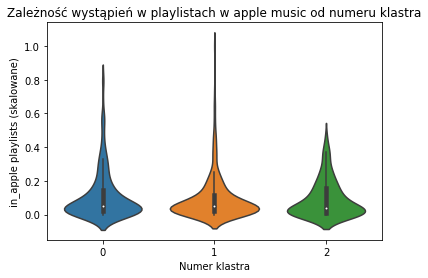

In [72]:
sns.violinplot(x='cluster', y='in_apple_playlists', data=merged_df)

plt.title('Zależność wystąpień w playlistach w apple music od numeru klastra')
plt.xlabel('Numer klastra')
plt.ylabel('in_apple playlists (skalowane)')
plt.show()

WNIOSEK: najbardziej powtarzajace sie piosenki w playlistach w apple music znajduja sie w klastrze 1 i 0

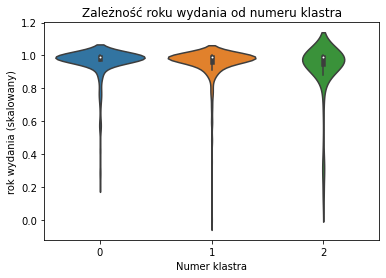

In [71]:
sns.violinplot(x='cluster', y='released_year', data=merged_df)

plt.title('Zależność roku wydania od numeru klastra')
plt.xlabel('Numer klastra')
plt.ylabel('rok wydania (skalowany)')
plt.show()

WNIOSEK: obecnie najmniej (popularnych) piosenek jest z klastra 2

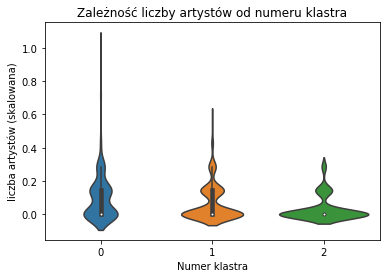

In [76]:
sns.violinplot(x='cluster', y='artist_count', data=merged_df)

plt.title('Zależność liczby artystów od numeru klastra')
plt.xlabel('Numer klastra')
plt.ylabel('liczba artystów (skalowana)')
plt.show()

WNIOSEK:
1. KLASTER 0 - czesto wykonywane piosenki przez kilku artystow, niemal tak samo czesto przez 1 i 2 artystow, 
    albo nawet do 8 => prawdopodobnie są to piosenki z gatunku **pop, rap, hip-hop** - to wlasnie tam czesto wystepuje kilku artysow
2. KLASTER 1 - najczesciej wykonywane solo, ale zdarzaja się piosenki kilku artystów, nawet do 5 artystow
3. KLASTER 2 - zdecydowana wiekszosc piosenek wykonywana jest solo, zdarzaja się piosenki 2 lub 3 artystów, ale nie więcej => znowu to wskazuje na piosenki typu acoustic, indie, classical etc.